In [1]:
import pandas as pd
import numpy as np
#from keras.layers import Dense 
#from keras.models import Sequential
#import keras
from sklearn.model_selection import train_test_split
#from keras.applications import MobileNet
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut 
import glob
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\Anuj Rajodiya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#punch = pd.read_csv('extractionCode/points.csv', header = None)
#kick = pd.read_csv('extractionCode/kick_points.csv', header = None)

### CSV info : 
col 1: number of keras <br> 
col 2: person label <br>
col 3: confidence of keypoints <br>
col 4 onwards : keypoints in form [x1,y1,x2,y2........x18,y18]

In [3]:
path = 'D:/PROJECT/action/keypoints'
punch_files = glob.glob(path + "/punch*.csv")
kick_files = glob.glob(path + "/kick*.csv")
str_files = glob.glob(path + "/str*.csv")
swg_files = glob.glob(path + "/Swinging Pipe-*.csv")

In [4]:
Data = []

In [5]:
print('Training files for punch:')
for filename in punch_files:
    #print(filename,'\n')
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    #print(df)
    #print('Unique \n',np.unique(df[2]))
    for i in np.unique(df[2]):
        print(len(df[df[2]==i]),' i= ',i,'hola\n')
        #print(int(len(df)*0.1),'condition')
        if (len(df[df[2] == i]) < int(len(df)*0.1)):     #Remove ith person
            df = df[df[2]!=i]
            #print(df)
    print("second iteration")
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

Training files for punch:
267  i=  1 hola

230  i=  2 hola

112  i=  3 hola

20  i=  4 hola

second iteration
43  i=  1 hola

31  i=  2 hola

second iteration
396  i=  1 hola

392  i=  2 hola

372  i=  3 hola

334  i=  4 hola

second iteration
268  i=  1 hola

second iteration
D:/PROJECT/action/keypoints\punch17.csv
686  i=  1 hola

686  i=  2 hola

second iteration
326  i=  1 hola

326  i=  2 hola

second iteration
223  i=  1 hola

138  i=  2 hola

96  i=  3 hola

78  i=  4 hola

12  i=  5 hola

10  i=  6 hola

9  i=  7 hola

6  i=  8 hola

5  i=  9 hola

2  i=  10 hola

2  i=  12 hola

second iteration
889  i=  1 hola

5  i=  2 hola

2  i=  3 hola

second iteration
D:/PROJECT/action/keypoints\punch20.csv
658  i=  1 hola

second iteration
D:/PROJECT/action/keypoints\punch21.csv
566  i=  1 hola

526  i=  2 hola

second iteration
253  i=  1 hola

253  i=  2 hola

second iteration
148  i=  1 hola

148  i=  2 hola

second iteration
372  i=  1 hola

373  i=  2 hola

1  i=  3 hola

second i

In [6]:
punch = pd.read_csv('D:/PROJECT/action/keypoints/punch23.csv',header = None)
nv1 = punch[punch[2]==1]
#punch = punch[punch[2]==2]
#punch = punch.drop([0,1,2,39],axis=1)
nv1 = nv1.drop([0,1,2,39],axis=1)
#punch = punch.values[:,:]
#for i in range(len(punch)//60):
#    Data.append(punch[60*i:(60*i)+60])

In [7]:
num_punch = len(Data)

In [8]:
print('Training files for kick:')
for filename in kick_files:
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    for i in df[2].unique():
        if (len(df[df[2] == i]) < int(len(df)*0.1)):
            df = df[df[2]!=i]
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

Training files for kick:
D:/PROJECT/action/keypoints\kick15.csv
D:/PROJECT/action/keypoints\kick18.csv
D:/PROJECT/action/keypoints\kick19.csv
D:/PROJECT/action/keypoints\kick24.csv
D:/PROJECT/action/keypoints\kick25.csv
D:/PROJECT/action/keypoints\kick26.csv
D:/PROJECT/action/keypoints\kick27.csv
D:/PROJECT/action/keypoints\kick28.csv
D:/PROJECT/action/keypoints\kick29.csv
D:/PROJECT/action/keypoints\kick30.csv
D:/PROJECT/action/keypoints\kick31.csv
D:/PROJECT/action/keypoints\kick32.csv
D:/PROJECT/action/keypoints\kick33.csv
D:/PROJECT/action/keypoints\kick34.csv
D:/PROJECT/action/keypoints\kick35.csv
D:/PROJECT/action/keypoints\kick36.csv
D:/PROJECT/action/keypoints\kick38.csv
D:/PROJECT/action/keypoints\kick39.csv
D:/PROJECT/action/keypoints\kick40.csv
D:/PROJECT/action/keypoints\kick41.csv
D:/PROJECT/action/keypoints\kick42.csv
D:/PROJECT/action/keypoints\kick43.csv
D:/PROJECT/action/keypoints\kick44.csv
D:/PROJECT/action/keypoints\kick45.csv
D:/PROJECT/action/keypoints\kick46.csv


In [9]:
#kick = pd.read_csv('/home/divyaansh/Desktop/keypoints_new/kick16.csv',header = None)
#kick = kick[kick[2]==2]
#kick = kick.drop([0,1,2,39],axis = 1)
#kick = kick.values[:,:]
##for i in range(len(kick)//60):
##    Data.append(kick[60*i:(60*i)+60])

In [10]:
num_kick = len(Data) - num_punch

In [11]:
#FOR STRANGLING...
print('Training files for Strangling:')
for filename in str_files:
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    for i in df[2].unique():
        if (len(df[df[2] == i]) < int(len(df)*0.1)):
            df = df[df[2]!=i]
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

Training files for Strangling:
D:/PROJECT/action/keypoints\str13.csv
D:/PROJECT/action/keypoints\str16.csv
D:/PROJECT/action/keypoints\str17.csv
D:/PROJECT/action/keypoints\str22.csv
D:/PROJECT/action/keypoints\str23.csv
D:/PROJECT/action/keypoints\str24.csv
D:/PROJECT/action/keypoints\str25.csv
D:/PROJECT/action/keypoints\str26.csv
D:/PROJECT/action/keypoints\str27.csv
D:/PROJECT/action/keypoints\str28.csv
D:/PROJECT/action/keypoints\str29.csv
D:/PROJECT/action/keypoints\str30.csv
D:/PROJECT/action/keypoints\str31.csv
D:/PROJECT/action/keypoints\str33.csv
D:/PROJECT/action/keypoints\str34.csv
D:/PROJECT/action/keypoints\str35.csv


In [12]:
num_str = len(Data) - (num_punch+num_kick)

In [13]:
#FOR SWINGING PIPE...
print('Training files for Swinging Pipe:')
for filename in swg_files:
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    for i in df[2].unique():
        if (len(df[df[2] == i]) < int(len(df)*0.1)):
            df = df[df[2]!=i]
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

Training files for Swinging Pipe:
D:/PROJECT/action/keypoints\Swinging Pipe-1.csv
D:/PROJECT/action/keypoints\Swinging Pipe-10.csv
D:/PROJECT/action/keypoints\Swinging Pipe-11.csv
D:/PROJECT/action/keypoints\Swinging Pipe-12.csv
D:/PROJECT/action/keypoints\Swinging Pipe-13.csv
D:/PROJECT/action/keypoints\Swinging Pipe-14.csv
D:/PROJECT/action/keypoints\Swinging Pipe-15.csv
D:/PROJECT/action/keypoints\Swinging Pipe-16.csv
D:/PROJECT/action/keypoints\Swinging Pipe-17.csv
D:/PROJECT/action/keypoints\Swinging Pipe-18.csv
D:/PROJECT/action/keypoints\Swinging Pipe-19.csv
D:/PROJECT/action/keypoints\Swinging Pipe-2.csv
D:/PROJECT/action/keypoints\Swinging Pipe-20.csv
D:/PROJECT/action/keypoints\Swinging Pipe-21.csv
D:/PROJECT/action/keypoints\Swinging Pipe-22.csv
D:/PROJECT/action/keypoints\Swinging Pipe-23.csv
D:/PROJECT/action/keypoints\Swinging Pipe-24.csv
D:/PROJECT/action/keypoints\Swinging Pipe-25.csv
D:/PROJECT/action/keypoints\Swinging Pipe-26.csv
D:/PROJECT/action/keypoints\Swinging 

In [14]:
num_swg = len(Data) - (num_str+num_punch+num_kick)

In [15]:
#FOR FALLING...

In [16]:
fall1 = pd.read_csv('D:/PROJECT/action/keypoints/fall4.csv',header = None)

In [17]:
fall1 = fall1[fall1[2]!=3]

In [18]:
fall1.head()

0          1   2     3    4     5    6     7    8     9  ...   30    31  \
0  18.0  23.405970   1   838  422   832  408   796  431   762 ...  652   830   
1  17.0  21.606630   2  1260  302  1271  331  1231  309  1182 ...  632  1258   
3  18.0  21.225025   1   832  437   826  418   791  443   756 ...  652   823   
4  17.0  21.305842   2  1259  300  1269  330  1229  309  1180 ...  632  1257   
6  18.0  26.434991   1   828  449   822  429   786  454   751 ...  654   819   

    32    33   34   35   36    37   38  39  
0  415   842  413  814  403   852  394 NaN  
1  291  1273  297   -1   -1  1296  301 NaN  
3  432   837  429  808  419   845  409 NaN  
4  290  1271  295   -1   -1  1295  299 NaN  
6  445   833  441  805  433   841  422 NaN  

[5 rows x 40 columns]

In [19]:
nv = fall1[fall1[2]==2]
fall1 = fall1[fall1[2]==1]

In [20]:
fall1 = fall1.drop([0,1,2,39], axis = 1)
nv = nv.drop([0,1,2,39], axis = 1)

In [21]:
fall2 = pd.read_csv('D:/PROJECT/action/keypoints/fall5.csv',header = None)

In [22]:
fall2 = fall2[fall2[2]!=3]

In [23]:
fall2.head()

0          1   2    3    4    5    6    7    8    9  ...   30   31   32  \
0  16.0  12.890967   1  879  425  862  435  857  441  882 ...  561  875  423   
1  17.0  14.792035   1  880  432  866  437  856  443  871 ...  566  876  431   
2  16.0  14.220612   1  883  434  867  441  859  446  876 ...  569  879  432   
3  15.0  10.497675   1  884  437  871  444  863  450  888 ...   -1  882  435   
4  13.0   5.602678   2  932  490  941  505   -1   -1   -1 ...  568   -1   -1   

    33   34   35   36   37   38  39  
0   -1   -1  866  424   -1   -1 NaN  
1  881  430  868  429   -1   -1 NaN  
2   -1   -1  871  432   -1   -1 NaN  
3   -1   -1  874  434   -1   -1 NaN  
4  935  488   -1   -1  940  490 NaN  

[5 rows x 40 columns]

In [24]:
nv2 = fall2[fall2[2] == 1]
fall2 = fall2[fall2[2] == 2]

In [25]:
len(fall2)

107

In [26]:
len(nv2)

161

In [27]:
fall2 = fall2.drop([0,1,2,39], axis = 1)
nv2 = nv2.drop([0,1,2,39],axis=1)

In [28]:
fall3 = pd.read_csv('D:/PROJECT/action/keypoints/fall6.csv', header = None)

In [29]:
fall3.head()

0          1   2     3    4     5    6     7    8     9  ...   30    31  \
0  17.0  22.167981   1  1122  423  1137  456  1127  451  1118 ...  642  1122   
1  17.0  23.176588   1  1122  424  1137  456  1127  451  1118 ...  643  1122   
2  17.0  22.091282   1  1122  425  1138  456  1129  451  1118 ...  644  1123   
3  17.0  22.889551   1  1123  425  1138  456  1129  451  1118 ...  644  1124   
4  17.0  21.357282   1  1124  426  1138  457  1130  452  1117 ...  643  1127   

    32    33   34  35  36    37   38  39  
0  418  1128  419  -1  -1  1142  427 NaN  
1  419  1129  420  -1  -1  1143  428 NaN  
2  419  1129  421  -1  -1  1143  428 NaN  
3  419  1131  421  -1  -1  1144  428 NaN  
4  420  1131  422  -1  -1  1144  429 NaN  

[5 rows x 40 columns]

In [30]:
fall3 = fall3.drop([0,1,2,39], axis = 1)

In [31]:
fall4 = pd.read_csv('D:/PROJECT/action/keypoints/fall7.csv', header = None)

In [32]:
fall4.head()

0          1   2     3    4     5    6     7    8     9  ...   30    31  \
0  16.0  20.627819   1  1019  501  1041  526  1030  523  1033 ...  729  1016   
1  16.0  19.627229   1  1020  501  1041  526  1030  522  1036 ...  730  1016   
2  16.0  19.417827   1  1020  501  1042  526  1030  522  1037 ...  731  1017   
3  15.0  18.681642   1  1021  503  1042  526  1031  522    -1 ...  730  1018   
4  15.0  18.353054   1  1021  502  1042  526  1030  521    -1 ...  730  1019   

    32    33   34  35  36    37   38  39  
0  493  1025  495  -1  -1  1042  495 NaN  
1  493  1025  495  -1  -1  1042  495 NaN  
2  493  1025  496  -1  -1  1043  495 NaN  
3  494  1026  497  -1  -1  1043  497 NaN  
4  494  1026  497  -1  -1  1043  496 NaN  

[5 rows x 40 columns]

In [33]:
fall4 = fall4.drop([0,1,2,39],axis = 1)

In [34]:
print(len(fall3),len(fall4))

434 327


In [35]:
fall5 = pd.read_csv('D:/PROJECT/action/keypoints/fall8.csv', header = None)

In [36]:
fall5.head()

0          1   2     3    4     5    6     7    8     9  ...   30    31  \
0  16.0  24.491343   1  1228  488  1246  521  1233  515  1230 ...  730  1228   
1  18.0  27.237292   2  1013  458  1010  484   986  486   973 ...  680  1008   
2  15.0  18.945323   3   963  512   939  541   944  547   948 ...  754   958   
3  16.0  24.138979   1  1228  488  1246  521  1233  515  1229 ...  729  1228   
4  18.0  27.074516   2  1014  458  1010  485   986  486   972 ...  680  1009   

    32    33   34   35   36    37   38  39  
0  482  1233  483   -1   -1  1250  488 NaN  
1  453  1019  452  998  453  1023  451 NaN  
2  507   965  505  944  509    -1   -1 NaN  
3  482  1233  483   -1   -1  1250  488 NaN  
4  453  1019  453  998  454  1023  451 NaN  

[5 rows x 40 columns]

In [37]:
fall6 = fall5[fall5[2]==1]
fall7 = fall5[fall5[2]==2]
fall5 = fall5[fall5[2]==3]

In [38]:
fall6 = fall6.drop([0,1,2,39],axis=1)
fall7 = fall7.drop([0,1,2,39],axis = 1)
fall5 = fall5.drop([0,1,2,39],axis = 1)

In [39]:
fall6.head()

3    4     5    6     7    8     9    10   11   12 ...     29   30  \
0   1228  488  1246  521  1233  515  1230  559   -1   -1 ...   1250  730   
3   1228  488  1246  521  1233  515  1229  558   -1   -1 ...   1250  729   
6   1227  488  1246  521  1233  515  1229  561   -1   -1 ...   1247  725   
9   1014  459  1010  487   987  489   974  527  975  564 ...   1007  679   
12  1014  460  1010  487   986  490   974  528  973  564 ...   1006  680   

      31   32    33   34   35   36    37   38  
0   1228  482  1233  483   -1   -1  1250  488  
3   1228  482  1233  483   -1   -1  1250  488  
6   1228  482  1232  483   -1   -1  1250  489  
9   1008  455  1019  454  998  456  1023  453  
12  1008  455  1019  454  998  457  1023  454  

[5 rows x 36 columns]

In [40]:
fall = [fall1,fall2,fall3,fall4,fall5,fall6,fall7]
for data in fall:
    data = data.values[:,:]
    for i in range(len(data)//40):
        Data.append(data[40*i:40*(i+1)])      

In [41]:
num_fall = len(Data) - (num_punch+num_kick+num_str+num_swg)

In [42]:
nv3 = pd.read_csv('D:/PROJECT/action/keypoints/kick17.csv',header = None)

In [43]:
nv3.head()

0          1   2     3    4     5    6     7    8     9  ...   30    31  \
0  15.0  16.117349   1  1049  507  1024  530  1021  532  1008 ...  672  1044   
1  15.0  16.061313   2  1133  508  1148  529  1144  527  1142 ...  683    -1   
2  15.0  15.951356   1  1047  508  1023  530  1021  532  1008 ...  671  1043   
3  15.0  15.604467   2  1132  507  1147  529  1145  528  1143 ...  683    -1   
4  15.0  15.644926   1  1046  508  1023  531  1020  532  1006 ...  670  1043   

    32    33   34    35   36    37   38  39  
0  502    -1   -1  1032  505    -1   -1 NaN  
1   -1  1137  505    -1   -1  1147  508 NaN  
2  504    -1   -1  1031  506    -1   -1 NaN  
3   -1  1136  504    -1   -1  1145  507 NaN  
4  505    -1   -1  1030  507    -1   -1 NaN  

[5 rows x 40 columns]

In [44]:
nv3 = nv3[nv3[2] == 2]
nv3 = nv3.drop([0,1,2,39],axis = 1)

In [45]:
nv4 = pd.read_csv('D:/PROJECT/action/keypoints/kick16.csv',header = None)

In [46]:
nv4 = nv4[nv4[2] == 1]
nv4 = nv4.drop([0,1,2,39],axis=1)

In [47]:
nv = [nv,nv2,nv3,nv4]
for data in nv:
    data = data.values[:,:]
    for i in range(len(data)//40):
        Data.append(data[40*i:40*(i+1)])      

In [48]:
#for Normal acivities - JUMPING
print('Training files for Jumping:')
jmp_files=glob.glob(path + "/Jumping-*.csv")
for filename in jmp_files:
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    for i in df[2].unique():
        if (len(df[df[2] == i]) < int(len(df)*0.1)):
            df = df[df[2]!=i]
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

Training files for Jumping:
D:/PROJECT/action/keypoints\Jumping-11.csv
D:/PROJECT/action/keypoints\Jumping-12.csv
D:/PROJECT/action/keypoints\Jumping-13.csv
D:/PROJECT/action/keypoints\Jumping-4.csv
D:/PROJECT/action/keypoints\Jumping-5.csv
D:/PROJECT/action/keypoints\Jumping-8.csv


In [49]:
#for Normal acivities - WALKING
wlk_files=glob.glob(path + "/Walking-1_*.csv")
for filename in wlk_files:
    df = pd.read_csv(filename,header = None)
    df = df[df[0]>=10]
    for i in df[2].unique():
        if (len(df[df[2] == i]) < int(len(df)*0.1)):
            df = df[df[2]!=i]
    if(df[2].nunique() == 1):
        print(filename)
        df = df.drop([0,1,2,39], axis = 1)
        data = df.values[:,:]
        for i in range(len(data)//40):
            Data.append(data[40*i:(40*i)+40])

D:/PROJECT/action/keypoints\Walking-1_1.csv
D:/PROJECT/action/keypoints\Walking-1_13.csv
D:/PROJECT/action/keypoints\Walking-1_17.csv
D:/PROJECT/action/keypoints\Walking-1_18.csv
D:/PROJECT/action/keypoints\Walking-1_19.csv
D:/PROJECT/action/keypoints\Walking-1_2.csv
D:/PROJECT/action/keypoints\Walking-1_20.csv
D:/PROJECT/action/keypoints\Walking-1_21.csv
D:/PROJECT/action/keypoints\Walking-1_22.csv
D:/PROJECT/action/keypoints\Walking-1_24.csv
D:/PROJECT/action/keypoints\Walking-1_3.csv
D:/PROJECT/action/keypoints\Walking-1_4.csv
D:/PROJECT/action/keypoints\Walking-1_5.csv
D:/PROJECT/action/keypoints\Walking-1_7.csv
D:/PROJECT/action/keypoints\Walking-1_9.csv


In [50]:
num_nv = len(Data) - (num_punch+num_kick+num_fall+num_str+num_swg)

In [51]:
print(num_punch,num_kick,num_fall,num_nv,num_str,num_swg)

76 73 46 78 97 49


In [52]:
#for filename in str_files:  
#    df = pd.read_csv(filename,header = None)
#    df = df[df[0]>=10]
#    for i in df[2].unique():
#        if (len(df[df[2] == i]) < int(len(df)*0.1)):
#            df = df[df[2]!=i]
#    if(df[2].nunique() == 1):
#        df = df.drop([0,1,2,39], axis = 1)
#        data = df.values[:,:]
#        for i in range(len(data)//60):
#            Data.append(data[60*i:(60*i)+60])

In [53]:
#a

In [54]:
#num_str = len(Data) - (num_punch + num_kick + num_fall)

In [55]:
#punch_df = punch[punch.index % 2 != 0]
#non_violentp = punch[punch.index % 2 == 0]
#kick_df = kick[kick.index % 2 !=0]
#non_violentk = kick[kick.index % 2 == 0]

In [56]:
#non_violent = pd.concat([non_violentp,non_violentk], axis = 0)

In [57]:
#punch_df = punch.drop([0, 1, 2, 39], axis = 1)
#kick_df = kick.drop([0, 1, 2, 39], axis = 1)
#non_violent = non_violent.drop([1,2,3], axis = 1)

In [58]:
#punch_df.head()

In [59]:
#kick_df.head()

In [60]:
#punch = punch_df.values[:,:]
#kick = kick_df.values[:,:]
#non_violent = non_violent.values[:,:]

In [61]:
#data = []
#for i in range(len(punch)//60):
#    data.append(punch[60*i:(60*i)+60])
#num_punch = len(data)
#for i in range(len(kick)//60):
#    data.append(kick[60*i:(60*i)+60])
#num_kick = len(data) - num_punch
#for i in range(len(non_violent)//15):
#    data.append(non_violent[15*i:(15*i)+15])
#num_nv = len(data) - (num_punch + num_kick)

In [62]:
#print(num_punch,num_kick)#num_str)

In [63]:
Data[0:6]

[array([[901, 313, 955, ...,  -1, 949, 310],
        [900, 314, 954, ...,  -1, 949, 309],
        [899, 314, 954, ...,  -1, 947, 309],
        ...,
        [874, 307, 934, ...,  -1, 917, 307],
        [876, 308, 934, ...,  -1, 918, 307],
        [877, 309, 934, ...,  -1, 919, 308]], dtype=int64),
 array([[878, 310, 933, ...,  -1, 920, 308],
        [878, 311, 932, ...,  -1, 922, 310],
        [878, 312, 931, ...,  -1, 924, 312],
        ...,
        [869, 311, 913, ...,  -1, 921, 303],
        [869, 310, 913, ...,  -1, 921, 303],
        [868, 311, 914, ...,  -1, 921, 303]], dtype=int64),
 array([[868, 311, 914, ...,  -1, 920, 302],
        [868, 311, 914, ...,  -1, 919, 302],
        [867, 310, 913, ...,  -1, 919, 302],
        ...,
        [825, 305, 885, ...,  -1, 870, 300],
        [823, 303, 884, ...,  -1, 867, 300],
        [822, 302, 883, ...,  -1, 866, 299]], dtype=int64),
 array([[821, 302, 882, ...,  -1, 863, 299],
        [819, 301, 880, ...,  -1, 862, 299],
        [817, 30

In [64]:
Data = np.asarray(Data)
Data = np.nan_to_num(Data)
Data = np.where(Data == -1, 0, Data)

In [65]:
labels = []
j = 0
for i in range(len(Data)):
    if (i<num_punch):
        labels.append(0)
    elif(j< num_punch + num_kick):
        labels.append(1)
    elif(j< num_punch + num_kick + num_str):   #str
        labels.append(2)
    elif(j< num_punch + num_kick + num_str + num_swg):   #swg
        labels.append(4)    
    elif(j< num_punch + num_kick + num_str + num_swg + num_fall):     #fall 
        labels.append(5)
    else:            #non_violent
        labels.append(6)
    j+=1
labels = np.asarray(labels)

In [66]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 4, 5, 6]), array([76, 73, 97, 49, 46, 78], dtype=int64))

In [67]:
train_data = []
for i in range(len(Data)):
    train_data.append(Data[i].flatten())
train_data = np.asarray(train_data)

In [68]:
#X_train, X_test, y_train, y_test = train_test_split(train_data,labels,test_size = 0.1, random_state = 42)
#loo = LeaveOneOut()
#loo.get_n_splits(train_data)

In [69]:
#model = RandomForestClassifier(random_state = 42 , class_weight = 'balanced')
#acc = []
#for train_index, test_index in loo.split(train_data):
    #print(test_index)
#    X_train, X_test = train_data[train_index], train_data[test_index]
#    y_train, y_test = labels[train_index], labels[test_index]
#    model.fit(X_train,y_train)
#    a = accuracy_score(y_test, model.predict(X_test))
    #print(a)
    #print("-------")
#    acc.append(a)
#print(sum(acc)/len(acc))

#model.fit(X_train,y_train)
#test_pred = model.predict(X_test)
#train_pred = model.predict(X_train)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(train_data,labels,test_size = 0.2, random_state = 42)

In [71]:
params = {
    'n_estimators':[10,30,50,100],
    'max_depth':[None,10,15,20],
}
model = RandomForestClassifier(n_estimators=30,max_depth=None,random_state=42,class_weight='balanced')
model = GridSearchCV(model,params,cv=5)

In [72]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 30, 50, 100], 'max_depth': [None, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
model.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [74]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
# print(test_pred)
# print(train_pred)

In [75]:
accuracy_score(y_test,test_pred)

0.6071428571428571

In [76]:
accuracy_score(y_train,train_pred)

1.0

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()
# print('\n')
# print(cm)

array([0.65      , 0.53333333, 0.91666667, 0.28571429, 0.66666667,
       0.65      ])

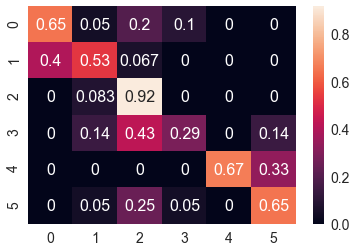

In [78]:
#classwise aaccuracy
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(6),
                  range(6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()


In [79]:
def preprocess_data(data):
    #punch_data = pd.read_csv(file,header = None)
    punch_data = data.copy()
    punch_data = punch_data.drop([0,1,2,39],axis = 1)
    test_punch = np.asarray(punch_data)
    test_punch = np.nan_to_num(test_punch)
    test_punch = np.where(test_punch == -1, 0, test_punch)
    Data = []
    for i in range(len(test_punch)//40):
        Data.append(test_punch[40*i:40*(i+1)])
    test_punch = []
    for i in range(len(Data)):
        test_punch.append(Data[i].flatten())
    test_punch = np.asarray(test_punch)
    return test_punch

In [80]:
punch_data = pd.read_csv('D:/PROJECT/action/keypoints/Test_video_new1.csv',header = None)
punch_data = preprocess_data(punch_data)
#kick_data = new_data('/home/divyaansh/Desktop/simpleKick.csv')

In [81]:
num_punch = len(punch_data)
print(num_punch)
#num_kick = len(kick_data)

1


In [82]:
#num_punch,num_kick

In [83]:
#data = np.concatenate((punch_data, kick_data), axis=0)

In [84]:
#len(data)

In [85]:
model.predict(punch_data)

array([2])

In [86]:
data = pd.read_csv('D:/PROJECT/action/keypoints/kick20.csv' , header = None)

In [87]:
p1 = data[data[2] == 1]
p2 = data[data[2] == 2]

In [88]:
p1 = p1.drop([0,1,2,39], axis = 1)
p2 = p2.drop([0,1,2,39], axis = 1)

In [89]:
p1 = np.asarray(p1)
p1 = np.nan_to_num(p1)
p1 = np.where(p1 == -1, 0, p1)

p2 = np.asarray(p2)
p2 = np.nan_to_num(p2)
p2 = np.where(p2 == -1, 0, p2)

In [90]:
Data = []
#p1 = p1.values[:,:]
for i in range(len(p1)//60):
    Data.append(p1[40*i:40*(i+1)])
p1 = []
for i in range(len(Data)):
    p1.append(Data[i].flatten())
p1 = np.asarray(p1)

Data = []
#p2 = p2.values[:,:]
for i in range(len(p2)//40):
    Data.append(p2[40*i:40*(i+1)])
p2 = []
for i in range(len(Data)):
    p2.append(Data[i].flatten())
p2 = np.asarray(p2)

In [91]:
len(p1),len(p2)

(4, 6)

In [92]:
Labels = ['Punch', 'Kick', 'Fall', 'Strangling' ,'Swinging Pipe','Normal']

In [93]:
pred = model.predict(p1)
print([Labels[i] for i in pred])

IndexError: list index out of range

In [ ]:
pred = model.predict(p2)
print([Labels[i] for i in pred])

In [ ]:
data = pd.read_csv('D:/PROJECT/action/keypoints/singlefall2.csv' , header = None)

In [ ]:
data = data[data[2] == 1]

In [ ]:
len(data)

In [ ]:
data = data.drop([0,1,2,39], axis = 1)

In [ ]:
data = data.values[:,:]
#data = np.asarray(data)
data = np.nan_to_num(data)
data = np.where(data == -1, 0, data)

In [ ]:
Data = []
#p1 = p1.values[:,:]
for i in range(len(data)//60):
    #print(len(data)//60)
    #print(i)
    Data.append(data[60*i:60*(i+1)])
data = []
for i in range(len(Data)):
    data.append(Data[i].flatten())
data = np.asarray(data)

In [ ]:
len(data)

In [ ]:
pred = model.predict(data)
print([Labels[i] for i in pred])

In [ ]:
data = pd.read_csv('D:/PROJECT/action/keypoints/kick17.csv' , header = None)

In [ ]:
p1 = data[data[2] == 1]
p2 = data[data[2] == 2]
#p3 = data[data[2] == 3]
#p4 = data[data[2] == 4]

In [ ]:
p1 = preprocess_data(p1)
p2 = preprocess_data(p2)
#p3 = new_data(p3)
#p4 = new_data(p4)

In [ ]:
len(p1),len(p2)

In [ ]:
pred = model.predict(p1)
print([Labels[i] for i in pred])

In [ ]:
pred = model.predict(p2)
print([Labels[i] for i in pred])